Example 1) 평균 벡터와 공분산 행렬 예제 (3주차 강의자료 p.15)

In [ ]:
import numpy as np

x = np.array([[5.1,3.5,1.4,0.2], [4.9,3.0,1.4,0.2], [4.7,3.2,1.3,0.2], [4.6,3.1,1.5,0.2], [5.0,3.6,1.4,0.2], [5.4,3.9,1.7,0.4], [4.6,3.4,1.4,0.3], [5.0,3.4,1.5,0.2]])
print(x, '\n\n')

x_mean = x.mean(axis=0)
print(x_mean, '\n\n')

x_var = np.cov(x.T, ddof=0)
print(x_var)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]] 


[4.9125 3.3875 1.45   0.2375] 


[[0.06609375 0.05265625 0.018125   0.00828125]
 [0.05265625 0.07359375 0.018125   0.01296875]
 [0.018125   0.018125   0.0125     0.005625  ]
 [0.00828125 0.01296875 0.005625   0.00484375]]


In [ ]:
import math

prob_yut = np.array([4/16, 6/16, 4/16, 1/16, 1/16])

print(prob_yut, '\n\n')

H_yut = 0;
for i in prob_yut:
  H_yut += - i*math.log2(i)

print(H_yut, '\n\n')

prob_dice = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

H_dice = 0;
for i in prob_dice:
  H_dice += - i*math.log2(i)

print(H_dice)


[0.25   0.375  0.25   0.0625 0.0625] 


2.0306390622295662 


2.584962500721156


In [ ]:
import numpy as np

# 예제 데이터: x는 어떤 변수, y는 다른 변수
x = np.array([1, 2, 3, 4])  # 예를 들어, 학생들의 공부 시간
y = np.array([5, 6, 7, 8])  # 예를 들어, 같은 학생들의 시험 점수

# numpy.cov 함수를 사용하여 공분산 계산
cov_matrix = np.cov(x, y)

print(cov_matrix)

[[1.66666667 1.66666667]
 [1.66666667 1.66666667]]


### **1. 예제 2.4 (4주차 강의자료 page 22)**

In [1]:
import numpy as np

mu = np.array([3, 1]) #평균벡터

Sigma = np.array([[2, 0],[0, 2]]) #공분산 행렬 - 대각선 상의 원소는 각 변수의 분산

det_Sigma = np.linalg.det(Sigma)#공분산 행렬의 행렬식 계산
print('Determinant of Sigma=\n', det_Sigma)

inv_Sigma = np.linalg.inv(Sigma) #공분산 행렬의 역행렬
print('Inverse matrix of Sigma=\n', inv_Sigma)

#위에서부터 2차식, 1차식, 상수항 계수, @은 행렬곱
coef1 = -1/2*inv_Sigma #1차식 계수 = -1/2*공분산 역행렬
coef2 = mu.T @ inv_Sigma #2차식 계수 = 평균벡터의 전치행렬 @ 공분산 역행렬
coef3 = -1/2*mu.T @ inv_Sigma @ mu - np.log(2*3.14) - 1/2*np.log(det_Sigma) #상수 = -1/2*평균벡터 전치 @ 공분산 역행렬 @ 평균벡터 - 변수 개수/2*log(2pi) - 1/2(공분산 절댓값=공분산 행렬의 행렬식)

print('Coefficient 1 =\n', coef1)
print('Coefficient 2 =\n', coef2)
print('Coefficient 3 =\n', coef3)

Determinant of Sigma=
 4.0
Inverse matrix of Sigma=
 [[0.5 0. ]
 [0.  0.5]]
Coefficient 1 =
 [[-0.25 -0.  ]
 [-0.   -0.25]]
Coefficient 2 =
 [1.5 0.5]
Coefficient 3 =
 -5.030517161040053



### **LDA 2. 예제 2.5 (4주차 강의자료 page 26)**

In [ ]:
#공분산이 같을 때 = 선형 판별 분석(LDA)
import numpy as np

omega_1 = np.transpose(np.array([[1,2],[3,1],[5,2],[3,3]])) #전치를 취해서 저장, 각 행 = 변수

print(omega_1)

omega1_mean = omega_1.mean(axis=1) #행에 대한 평균 [(1+3+5+3)/4=3, (2+1+2+3)/4=2]
omega1_var = np.cov(omega_1, ddof=0)#공분산 행렬을 계산 ddof=0 옵션은 모집단 공분산

omega_2 = np.transpose(np.array([[6,6],[8,5],[10,6],[8,7]]))
omega2_mean = omega_2.mean(axis=1)#행에 대한 평균
omega2_var = np.cov(omega_2, ddof=0)#공분산 행렬을 계산 ddof=0 옵션은 모집단 공분산

print('mu_1=', omega1_mean)
print('mu_2=', omega2_mean)

print('Sigma_1=\n', omega1_var)
print('Sigma_2=\n', omega2_var)

inv_Sigma = np.linalg.inv(omega1_var) #오메가1의 공분산 행렬의 역행렬

# @는 행렬과 백터의 곱
# coef_1은 1차항, coef_2는 상수
coef_1 = inv_Sigma @ (omega1_mean - omega2_mean) # 1차항 계수 계산. 공분산 행렬의 역행렬(공분산 행렬이 동일함)과 두 클래스 평균의 차이
coef_2 = - 1/2*omega1_mean.T @ inv_Sigma @ omega1_mean + 1/2*omega2_mean.T @ inv_Sigma @ omega2_mean

print('coef_1=', coef_1)
print('coef_2=', coef_2)

test_x = np.transpose(np.array([8,2]))#테스트 데이터 포인트 정의

#사전확률 동일하게 설정
prob_w1 = 0.5
prob_w2 = 0.5

#식에 대입한 것 ax+b에 x에 테스트 데이터를 집어넣고 상수항에 사전확률을 넣음
g12 = coef_1 @ test_x + coef_2 + np.log(prob_w1) - np.log(prob_w2) 

print('g12(test_x) = ',g12) #양수이기 때문에 W1으로 분류됨.


[[1 3 5 3]
 [2 1 2 3]]
mu_1= [3. 2.]
mu_2= [8. 6.]
Sigma_1=
 [[2.  0. ]
 [0.  0.5]]
Sigma_2=
 [[2.  0. ]
 [0.  0.5]]
coef_1= [-2.5 -8. ]
coef_2= 45.75
g12(test_x) =  9.75


### **3. QDA예제 2.6 (4주차 강의자료 page 28)**

coef_1 = 
 [[-0.25 -0.  ]
 [-0.   -1.  ]]
coef_2 = 
 [1.5 4. ]
coef_3 = 
 -6.25
[[1 2]
 [3 1]
 [5 2]
 [3 3]
 [7 6]
 [8 4]
 [9 6]
 [8 8]]
[0 0 0 0 1 1 1 1]
[1 3 5 3] [2 1 2 3]


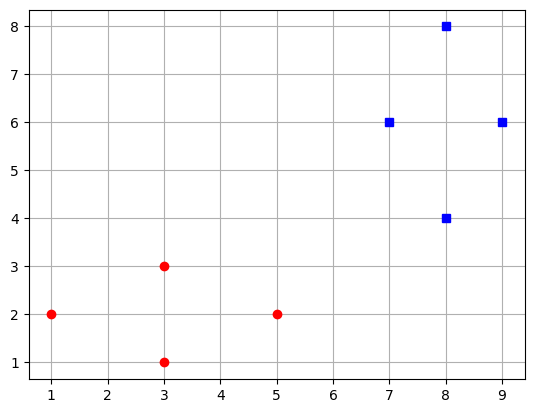

mu_1= [3. 2.]
mu_2= [8. 6.]
Sigma_1=
 [[2.  0. ]
 [0.  0.5]]
Sigma_2=
 [[0.5 0. ]
 [0.  2. ]]


coef_1 = 
 [[ 0.75  0.  ]
 [ 0.   -0.75]]
coef_2 = [-14.5   1. ]
coef_3 = 66.75
coef_3_08_02 = 272.5451774444796
coef_3_05_05 = 267.0
coef_3_02_08 = 261.4548225555204


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

omega_1 = np.transpose(np.array([[1,2],[3,1],[5,2],[3,3]]))#, [4,2], [2,4], [1,1], [2,2], [4,4]]))
y_omega1 = np.array([0, 0, 0, 0])#, 0, 0, 0, 0, 0])
omega1_mean = omega_1.mean(axis=1)# axis=1열 따라서 연산 수행 계산 -> 행 평균 구함
omega1_var = np.cov(omega_1, ddof=0) # 모집단 공분산 계산

inv_Sigma1 = np.linalg.inv(omega1_var)# 모집단 공분산의 역행렬 계산

#판별 함수 계수들 
coef1_for_g1 = - 1/2 * inv_Sigma1
coef2_for_g1 = omega1_mean.T @ inv_Sigma1
coef3_for_g1 = - 1/2 * omega1_mean.T @ inv_Sigma1 @ omega1_mean - 1/2 * np.log(np.linalg.det(omega1_var))

print('coef_1 = \n', coef1_for_g1)
print('coef_2 = \n', coef2_for_g1)
print('coef_3 = \n', coef3_for_g1)


omega_2 = np.transpose(np.array([[7,6],[8,4],[9,6],[8,8]]))
y_omega2 = np.array([1, 1, 1, 1])
omega2_mean = omega_2.mean(axis=1) #행 평균 계산
omega2_var = np.cov(omega_2, ddof=0)#모집단 공분산 계산

x_train = (np.concatenate([omega_1.T, omega_2.T]))  #두 배열의 전치를 하나의 배열로 연결하여 하나의 트레이닝 셋을 만듦#[[1 2],[3 1], [5 2], [3 3], [7 6], [8 4], [9 6], [8 8]]
y_train = np.concatenate([y_omega1, y_omega2])  #y축 부분도 하나로 합쳐 트레이닝 셋 생성 #[0 0 0 0 1 1 1 1]

# print(x_train[y_train==0, 0], x_train[y_train==0, 1])   #[1 3 5 3]
# print(x_train[y_train==1, 0], x_train[y_train==1, 1])   #[2 1 2 3]

#불리안 인덱싱 사용하여 x_train[y_train==0, 0]에서는 y_train==0을 만족하는 인덱스 0,1,2,3을 가져올 것, 
#그리고 x_train의 요소들 또한 배열이기 때문에 뒤에 0을 넣어줘서 요소들의 0번째 값들을 가져옴
#ro는 첫 번째 클래스의 데이터 포인트들을 빨간색(red) 원형(o) 마커로 표시
#bs: 두 번째 클래스의 데이터 포인트들을 파란색(blue) 사각형(s) 마커로 표시
plt.plot(x_train[y_train==0, 0], x_train[y_train==0, 1], 'ro', x_train[y_train==1, 0], x_train[y_train==1, 1], 'bs')
plt.grid(True)
plt.show()

print('mu_1=', omega1_mean)
print('mu_2=', omega2_mean)

print('Sigma_1=\n', omega1_var)
print('Sigma_2=\n', omega2_var)
print('\n')

inv_Sigma2 = np.linalg.inv(omega2_var) #모집단 공분산의 역행렬 

coef1_for_g2 = - 1/2 * inv_Sigma2
coef2_for_g2 = omega2_mean.T@inv_Sigma2
coef3_for_g2 = - 1/2 * omega2_mean.T @ inv_Sigma2 @ omega2_mean - 1/2 * np.log(np.linalg.det(omega2_var))

#w_1 - w_2의 계수별 계산
coef1_for_g12 = coef1_for_g1 - coef1_for_g2
coef2_for_g12 = coef2_for_g1 - coef2_for_g2
coef3_for_g12 = coef3_for_g1 - coef3_for_g2

print('coef_1 = \n', coef1_for_g12)
print('coef_2 =', coef2_for_g12)
print('coef_3 =', coef3_for_g12)

#각 사전 확률 w_1-w_2를 로그를 씌워서 계산
coef3_for_g12_08_02 = coef3_for_g12 + np.log(0.8)-np.log(0.2)
coef3_for_g12_05_05 = coef3_for_g12 + np.log(0.5)-np.log(0.5)
coef3_for_g12_02_08 = coef3_for_g12 + np.log(0.2)-np.log(0.8)

print('coef_3_08_02 =', 4*coef3_for_g12_08_02)
print('coef_3_05_05 =', 4*coef3_for_g12_05_05)
print('coef_3_02_08 =', 4*coef3_for_g12_02_08)


### **과제 최소 오류 베이시안**

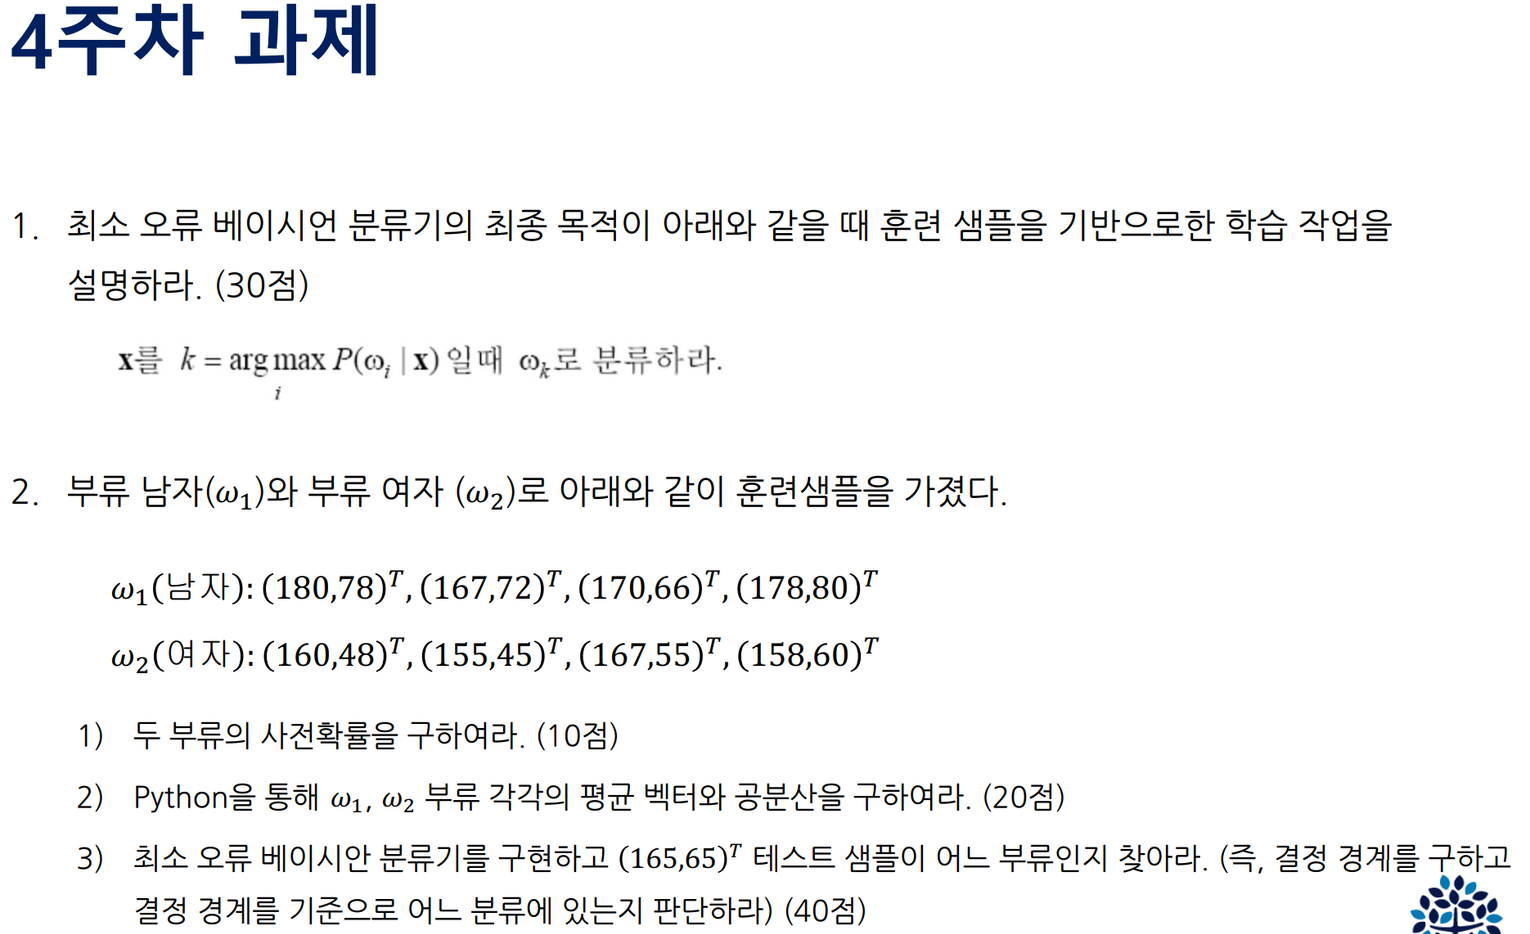

1.두 클래스(부류)의 전체 훈련 샘플 수는 w_1 = 4개, w_2 = 4개로 총 8개이며 각 클래스의 사전확률은 P(w_1) = 4/8=1/2, P(w_2) = 4/8 = 1/2 입니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#전치행렬을 선언하여 배열의 형태를 뒤집습니다.
w_1 = np.transpose(np.array([[180,78],[167, 72],[170,66],[178,80]]))
w_2 = np.transpose(np.array([[160, 48], [155, 45], [167,55],[158, 60]]))

#axis=1로 두고 평균을 계산하여 클래스별로 데이터들의 키의 평균, 몸무게 평균을 구합니다.
w_1mean = w_1.mean(axis=1)
w_2mean = w_2.mean(axis=1)

#ddof=0으로 두어 모집단 공분산을 각각 구합니다.
w_1cov = np.cov(w_1, ddof=0)
w_2cov = np.cov(w_2, ddof=0)

#출력하여 결과를 확인
print("w_1 평균: ", w_1mean)
print("w_2 평균: ",w_2mean)

print("w_1 공분산: ",w_1cov)
print("w_2 공분산: ",w_2cov)



w_1 평균:  [173.75  74.  ]
w_2 평균:  [160.  52.]
w_1 공분산:  [[29.1875 23.5   ]
 [23.5    30.    ]]
w_2 공분산:  [[19.5 10. ]
 [10.  34.5]]


w_1 평균:  [173.75  74.  ]
w_2 평균:  [160.  52.]
w_1 공분산:  [[29.1875 23.5   ]
 [23.5    30.    ]]
w_2 공분산:  [[19.5 10. ]
 [10.  34.5]]


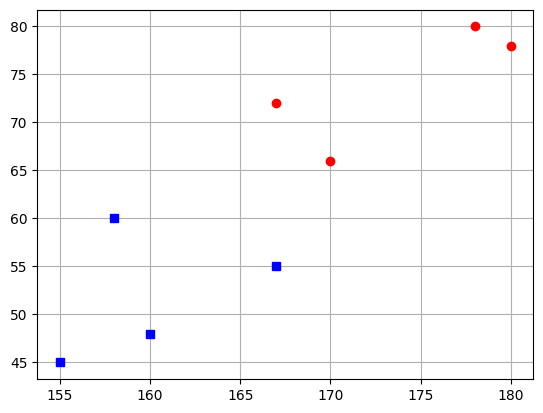

coef_1 = 
 [[-0.01626792  0.02760571]
 [ 0.02760571 -0.02810636]]
coef_2 = [ 2.011587   -4.92429545]
coef_3 = -41.03485572460363
사전확률 반영 시 테스트 데이터는 남자에 속합니다.
1.2967438085022138


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#전치행렬을 선언하여 배열의 형태를 뒤집습니다.
w_1 = np.transpose(np.array([[180,78],[167, 72],[170,66],[178,80]]))
w_2 = np.transpose(np.array([[160, 48], [155, 45], [167,55],[158, 60]]))

#axis=1로 두고 평균을 계산하여 클래스별로 데이터들의 키의 평균, 몸무게 평균을 구합니다.
w_1mean = w_1.mean(axis=1)
w_2mean = w_2.mean(axis=1)

#ddof=0으로 두어 모집단 공분산을 각각 구합니다.
w_1cov = np.cov(w_1, ddof=0)
w_2cov = np.cov(w_2, ddof=0)

#출력하여 결과를 확인
print("w_1 평균: ", w_1mean)
print("w_2 평균: ",w_2mean)

print("w_1 공분산: ",w_1cov)
print("w_2 공분산: ",w_2cov)


#클래스들의 공분산 역행렬을 구합니다.
inv_w_1 = np.linalg.inv(w_1cov)
inv_w_2 = np.linalg.inv(w_2cov)

#matplotlib으로 출력해 확인해보기 위해 아래와 같이 작성합니다.
y_omega1 = np.array([0, 0, 0, 0])
y_omega2 = np.array([1, 1, 1, 1])

#데이터 셋 합침
x_train = (np.concatenate([w_1.T, w_2.T])) 
y_train = np.concatenate([y_omega1, y_omega2])

#데이터 셋 출력
plt.plot(x_train[y_train==0, 0], x_train[y_train==0, 1], 'ro', x_train[y_train==1, 0], x_train[y_train==1, 1], 'bs')
plt.grid(True)
plt.show()

#남자 클래스 결정함수 2차항, 1차항, 상수 계산
coef1_for_g1 = -1/2 * inv_w_1
coef2_for_g1 = w_1mean.T @ inv_w_1
coef3_for_g1 = - 1/2 *  w_1mean.T @ inv_w_1 @ w_1mean - 1/2 * np.log(np.linalg.det(w_1cov))

#여자 클래스 결정함수 2차항, 1차항, 상수 계산
coef1_for_g2 = -1/2 * inv_w_2
coef2_for_g2 = w_2mean.T @ inv_w_2
coef3_for_g2 = - 1/2 *  w_2mean.T @ inv_w_2 @ w_2mean - 1/2 * np.log(np.linalg.det(w_2cov))

#결정곡선의 2차항, 1차항, 상수항 계수를 g1-g2를 통해서 구합니다.
coef1_for_g12 = coef1_for_g1 - coef1_for_g2
coef2_for_g12 = coef2_for_g1 - coef2_for_g2
coef3_for_g12 = coef3_for_g1 - coef3_for_g2

#위에서부터 결정곡선 2차항, 1차항, 상수항 계수를 출력하여 확인합니다.
print('coef_1 = \n', coef1_for_g12)
print('coef_2 =', coef2_for_g12)
print('coef_3 =', coef3_for_g12)

coef3_for_g12_05_05 = coef3_for_g12 + np.log(0.5)-np.log(0.5)     #상수항 - 사전 확률 w_1-w_2를 로그를 씌워서 계산합니다.

test = np.transpose(np.array([165,65])) #테스트 데이터

#결정곡선에 테스트 데이터를 대입하여 결과를 저장합니다.
g = (test.T @ coef1_for_g12 @ test) + (test.T @ coef2_for_g12) + coef3_for_g12_05_05
# g1 = (test.T @ coef1_for_g1 @ test) + (coef2_for_g1 @ test) + coef3_for_g1
# g2 = (test.T @ coef1_for_g2 @ test) + (coef2_for_g2 @ test) + coef3_for_g2


#테스트 결과가 양수면 'g남자 - g여자'였으므로 남자로 분류되고 음수면 여자로 분류됩니다.
if g > 0.: 
  print("사전확률 반영 시 테스트 데이터는 남자에 속합니다.")
else: 
  print("사전확률 반영 시 테스트 데이터는 여자에 속합니다.")

print(g) #결정함수 값 확인

# if g1 > g2:
#     print("사전확률 미반영 시 테스트 데이터는 남자에 속합니다.")
# else:
#     print("사전확률 미반영 시 테스트 데이터는 여자에 속합니다.")





### **베이시안 틀**

w_1 평균:  [173.75  74.    24.  ]
w_2 평균:  [160.   52.   37.5]
w_1 공분산:  [[ 29.1875  23.5    -10.    ]
 [ 23.5     30.     -12.    ]
 [-10.     -12.       8.    ]]
w_2 공분산:  [[19.5  10.    1.25]
 [10.   34.5  23.75]
 [ 1.25 23.75 31.25]]


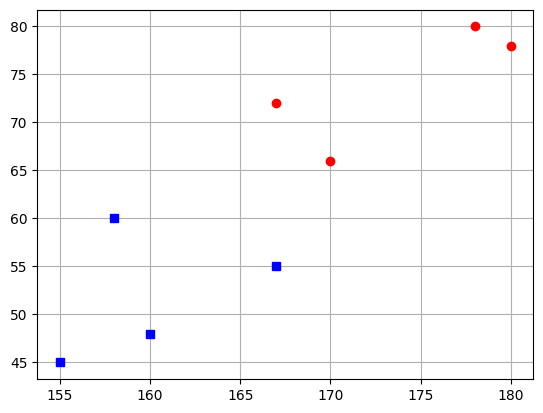

coef_1 = 
 [[-0.01232344  0.01419451  0.00427542]
 [ 0.01419451 -0.02433278 -0.08656217]
 [ 0.00427542 -0.08656217 -0.11940183]]
coef_2 = [ 1.73743371  4.91619695 15.04399766]
coef_3 = -509.92587042339596
사전확률 반영 시 테스트 데이터는 여자에 속합니다.
-45.243259940659755


In [10]:
import numpy as np
import matplotlib.pyplot as plt

#전치행렬을 선언하여 배열의 형태를 뒤집습니다.
omega_1 = np.transpose(np.array([[180,78,20],[167,72,24],[170,66,28],[178,80,24]]))
omega_2 = np.transpose(np.array([[160,48,40],[155,45,40],[167,55,35],[158,60,45]]))

#axis=1로 두고 평균을 계산하여 클래스별로 데이터들의 feature들의 평균을 구합니다.
omega1_mean = omega_1.mean(axis=1)
omega2_mean = omega_2.mean(axis=1)

#ddof=0으로 두어 모집단 공분산을 각각 구합니다.
omega1_var = np.cov(omega_1, ddof=0)
omega2_var = np.cov(omega_2, ddof=0)

#출력하여 결과를 확인
print("w_1 평균: ", omega1_mean)
print("w_2 평균: ",omega2_mean)

print("w_1 공분산: ",omega1_var)
print("w_2 공분산: ",omega2_var)


#클래스들의 공분산 역행렬을 구합니다.
inv_Sigma1 = np.linalg.inv(omega1_var)
inv_Sigma2 = np.linalg.inv(omega2_var)

#matplotlib으로 출력해 확인해보기 위해 아래와 같이 작성합니다.
y_omega1 = np.array([0, 0, 0, 0])
y_omega2 = np.array([1, 1, 1, 1])

#데이터 셋 합침
x_train = (np.concatenate([omega_1.T, omega_2.T])) 
y_train = np.concatenate([y_omega1, y_omega2])

#데이터 셋 출력
plt.plot(x_train[y_train==0, 0], x_train[y_train==0, 1], 'ro', x_train[y_train==1, 0], x_train[y_train==1, 1], 'bs')
plt.grid(True)
plt.show()

#w1 클래스 결정함수 2차항, 1차항, 상수 계산
coef1_for_g1 = - 1/2 * inv_Sigma1
coef2_for_g1 = omega1_mean.T @ inv_Sigma1
coef3_for_g1 = - 1/2 * omega1_mean.T @ inv_Sigma1 @ omega1_mean - 1/2 * np.log(np.linalg.det(omega1_var))

#w2 클래스 결정함수 2차항, 1차항, 상수 계산
coef1_for_g2 = - 1/2 * inv_Sigma2
coef2_for_g2 = omega2_mean.T@inv_Sigma2
coef3_for_g2 = - 1/2 * omega2_mean.T @ inv_Sigma2 @ omega2_mean - 1/2 * np.log(np.linalg.det(omega2_var))

#결정곡선의 2차항, 1차항, 상수항 계수를 g1-g2를 통해서 구합니다.
coef1_for_g12 = coef1_for_g1 - coef1_for_g2
coef2_for_g12 = coef2_for_g1 - coef2_for_g2
coef3_for_g12 = coef3_for_g1 - coef3_for_g2

#위에서부터 결정곡선 2차항, 1차항, 상수항 계수를 출력하여 확인합니다.
print('coef_1 = \n', coef1_for_g12)
print('coef_2 =', coef2_for_g12)
print('coef_3 =', coef3_for_g12)

coef3_for_g12_05_05 = coef3_for_g12 + np.log(0.5)-np.log(0.5)     #상수항 - 사전 확률 w_1-w_2를 로그를 씌워서 계산합니다.

test = np.transpose(np.array([165,65,45])) #테스트 데이터

#결정곡선에 테스트 데이터를 대입하여 결과를 저장합니다.
g = (test.T @ coef1_for_g12 @ test) + (test.T @ coef2_for_g12) + coef3_for_g12_05_05
# g1 = (test.T @ coef1_for_g1 @ test) + (coef2_for_g1 @ test) + coef3_for_g1
# g2 = (test.T @ coef1_for_g2 @ test) + (coef2_for_g2 @ test) + coef3_for_g2


#테스트 결과가 양수면 'w1 - w2'였으므로 w1로 분류되고 음수면 w2로 분류됩니다.
if g > 0.: 
  print("사전확률 반영 시 테스트 데이터는 남자에 속합니다.")
else: 
  print("사전확률 반영 시 테스트 데이터는 여자에 속합니다.")

print(g) #결정함수 값 확인



### ** 거리 계산 4. 예제 2.7 (4주차 강의자료 page 33)**

In [ ]:
import math
import numpy as np

omega_1 = np.transpose(np.array([[1,2],[3,1],[5,2],[3,3]])) #전치 하여 행렬을 저장
omega1_mean = omega_1.mean(axis=1)#평균 계산, axis=1은 열별로 연산을 의미
omega1_var = np.cov(omega_1, ddof=0) # 모집단 공분산 행렬


omega_2 = np.transpose(np.array([[6,6],[8,5],[10,6],[8,7]])) 
omega2_mean = omega_2.mean(axis=1)#평균 계산, axis=1은 열별로 연산을 의미
omega2_var = np.cov(omega_2, ddof=0)# 모집단 공분산 행렬


inv_Sigma = np.linalg.inv(omega1_var)#모집단 공분산 역행렬 

print(inv_Sigma)

x = np.transpose(np.array([8, 2]))#테스트 데이터 포인트

#마할라노비스 거리 계산 공식에 따라 x와 w_1, w_2 평균과의 거리 계산
Mahala_dist1 = math.sqrt( (x - omega1_mean).T @ inv_Sigma @ (x - omega1_mean) )
Mahala_dist2 = math.sqrt( (x - omega2_mean).T @ inv_Sigma @ (x - omega2_mean) )

print('Mahala distance from mean of omega 1 =',Mahala_dist1)
print('Mahala distance from mean of omega 2 =',Mahala_dist2)

#유클리드 거리를 계산
Euclidean_dist1 = np.linalg.norm(x - omega1_mean)#(테스트 데이터 - 클래스 평균)의 norm  
Euclidean_dist2 = np.linalg.norm(x - omega2_mean)

print('Euclidean distance from mean of omega 1 =',Euclidean_dist1)
print('Euclidean distance from mean of omega 2 =',Euclidean_dist2)

[[0.5 0. ]
 [0.  2. ]]
Mahala distance from mean of omega 1 = 3.5355339059327378
Mahala distance from mean of omega 2 = 5.656854249492381
Euclidean distance from mean of omega 1 = 5.0
Euclidean distance from mean of omega 2 = 4.0


### **3차원일 경우 거리계산**

In [11]:
import math
import numpy as np

omega_1 = np.transpose(np.array([[1,2,4],[3,1,2],[5,2,6],[3,3,4]])) #전치 하여 행렬을 저장
omega1_mean = omega_1.mean(axis=1)#평균 계산, axis=1은 열별로 연산을 의미
omega1_var = np.cov(omega_1, ddof=0) # 모집단 공분산 행렬


omega_2 = np.transpose(np.array([[6,6,10],[8,5,6],[10,6,8],[8,7,8]])) 
omega2_mean = omega_2.mean(axis=1)#평균 계산, axis=1은 열별로 연산을 의미
omega2_var = np.cov(omega_2, ddof=0)# 모집단 공분산 행렬


inv_Sigma = np.linalg.inv(omega1_var)#모집단 공분산 역행렬 

print(inv_Sigma)

x = np.transpose(np.array([8, 2, 7]))#테스트 데이터 포인트

#마할라노비스 거리 계산 공식에 따라 x와 w_1, w_2 평균과의 거리 계산
Mahala_dist1 = math.sqrt( (x - omega1_mean).T @ inv_Sigma @ (x - omega1_mean) )
Mahala_dist2 = math.sqrt( (x - omega2_mean).T @ inv_Sigma @ (x - omega2_mean) )

print('Mahala distance from mean of omega 1 =',Mahala_dist1)
print('Mahala distance from mean of omega 2 =',Mahala_dist2)

#유클리드 거리를 계산
Euclidean_dist1 = np.linalg.norm(x - omega1_mean)#(테스트 데이터 - 클래스 평균)의 norm  
Euclidean_dist2 = np.linalg.norm(x - omega2_mean)

print('Euclidean distance from mean of omega 1 =',Euclidean_dist1)
print('Euclidean distance from mean of omega 2 =',Euclidean_dist2)

[[ 0.75  0.5  -0.5 ]
 [ 0.5   3.   -1.  ]
 [-0.5  -1.    1.  ]]
Mahala distance from mean of omega 1 = 3.570714214271425
Mahala distance from mean of omega 2 = 6.4031242374328485
Euclidean distance from mean of omega 1 = 5.830951894845301
Euclidean distance from mean of omega 2 = 4.123105625617661


### **예제: 퍼셉트론의 동작 (p. 11)**

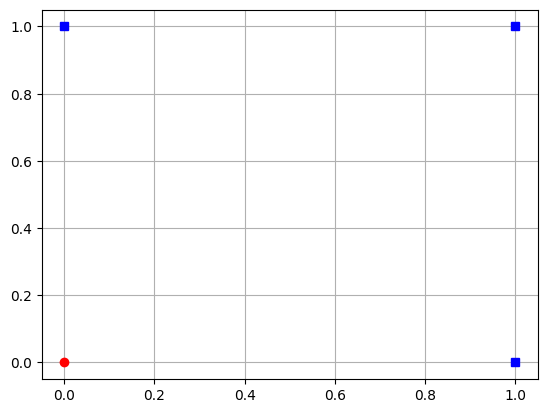

Classification:  [1 0]


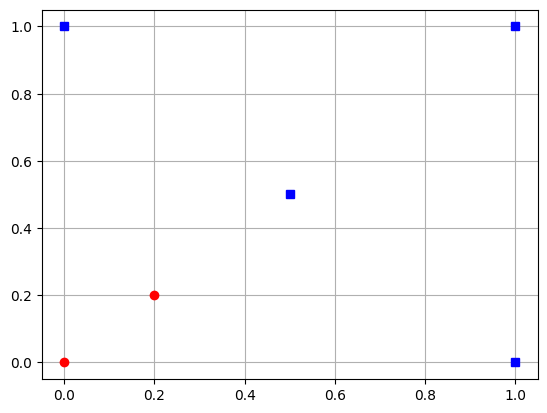

In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron #퍼셉트론 클래스 임포트
import matplotlib.pyplot as plt

x_train = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])    #2차원 데이터를 2차원 베열로 정의
y_train = np.array([0, 1, 1, 1])    #각 데이터 별 클래스를 0과 1로 분류

#y_train이 0이면 ro, y_train이 1이면 bs
plt.plot(x_train[y_train==0, 0], x_train[y_train==0, 1], 'ro', x_train[y_train==1, 0], x_train[y_train==1, 1], 'bs')
plt.grid(True)
plt.show()

ppn = Perceptron()#Perceptron 모델을 ppn이라는 변수에 인스턴스화
ppn.fit(x_train, y_train)#모델을 학습 데이터셋(x_train, y_train)에 맞추어(fit) 학습 시킴

x_test = np.array([[0.5, 0.5], [0.2, 0.2]]) # 평가를 위한 테스트 데이터셋 정의

#학습된 퍼셉트론 모델을 사용하여 x_test의 데이터 포인트에 대한 예측을 수행
y_pred = ppn.predict(x_test)#y_pred는 예측된 레이블을 의미 

print('Classification: ', y_pred)

#이전과 동일하게 y_train이 0이면 ro, y_train이 1이면 bs 
#여기에 추가로 테스트 데이터 셋도 y_pred==0이면 ro, y_pred==1이면 bs
plt.plot(x_train[y_train==0, 0], x_train[y_train==0, 1], 'ro', x_train[y_train==1, 0], x_train[y_train==1, 1], 'bs')
plt.plot(x_test[y_pred==0, 0], x_test[y_pred==0, 1], 'ro', x_test[y_pred==1, 0], x_test[y_pred==1, 1], 'bs')
plt.grid(True)
plt.show()

### **예제#1) 퍼셉트론 분류기 문제** (p.34)

[[1 2]
 [3 1]
 [5 2]
 [3 3]]
[[ 6  6]
 [ 8  5]
 [10  6]
 [ 8  7]]
[[ 1  2]
 [ 3  1]
 [ 5  2]
 [ 3  3]
 [ 6  6]
 [ 8  5]
 [10  6]
 [ 8  7]]


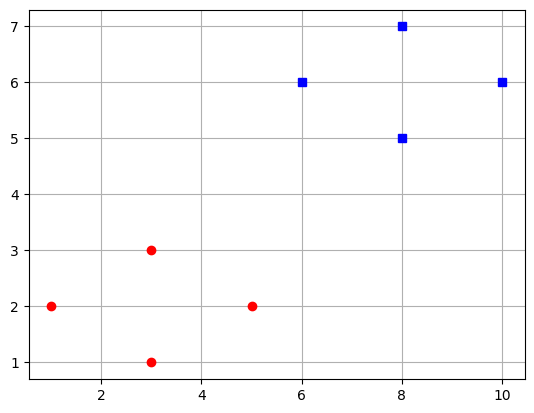

Prediction for perceptron = [0]


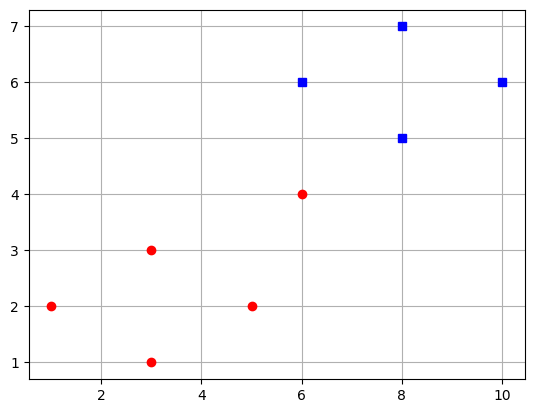

In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

#w_1 = 클래스(부류)가 0인 데이터 셋
omega_1 = (np.array([[1,2],[3,1],[5,2],[3,3]]))
y_omega1 = np.array([0, 0, 0, 0])

#w_2 = 클래스(부류)가 1인 데이터 셋
omega_2 = (np.array([[6,6],[8,5],[10,6],[8,7]]))
y_omega2 = np.array([1, 1, 1, 1])

#두 그룹의 데이터 포인트를 연결하여 훈련 데이터 세트 만듦
x_train = (np.concatenate([omega_1, omega_2]))
#두 그룹의 레이블을 연결하여 훈련 데이터 세트의 레이블 만듦
y_train = np.concatenate([y_omega1, y_omega2])

print(omega_1)
print(omega_2)
print(x_train)

#y_train==0이면 ro, y_train==1이면 bs로 출력
plt.plot(x_train[y_train==0, 0], x_train[y_train==0, 1], 'ro', x_train[y_train==1, 0], x_train[y_train==1, 1], 'bs')
plt.grid(True)
plt.show()

ppn = Perceptron()#Perceptron 모델 인스턴스 생성
ppn.fit(x_train, y_train) #훈련 데이터(x_train, y_train)를 사용하여 Perceptron 모델을 학습시킴

x_test = np.array([[6,4]]) # 테스트할 새로운 데이터 포인트를 정의

y_pred = ppn.predict(x_test) # 학습된 모델로  x_test 데이터 포인트의 레이블을 예측

print('Prediction for perceptron =', y_pred)

plt.plot(x_train[y_train==0, 0], x_train[y_train==0, 1], 'ro', x_train[y_train==1, 0], x_train[y_train==1, 1], 'bs')
plt.plot(x_test[y_pred==0, 0], x_test[y_pred==0, 1], 'ro', x_test[y_pred==1, 0], x_test[y_pred==1, 1], 'bs')
plt.grid(True)
plt.show()

### **Example1) 선형 SVM: 두개의 샘플**

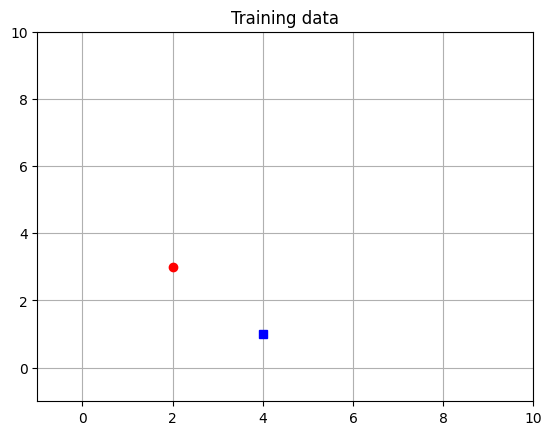

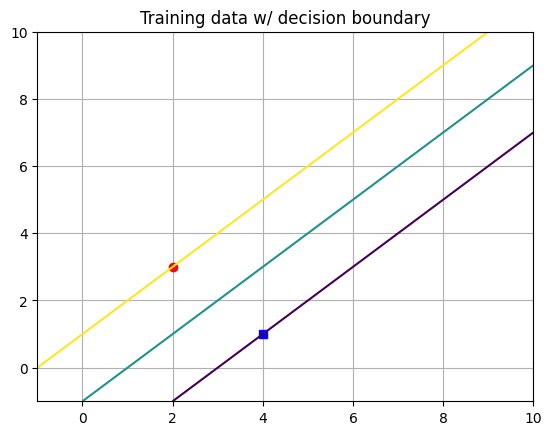

Results:  [ 1 -1]


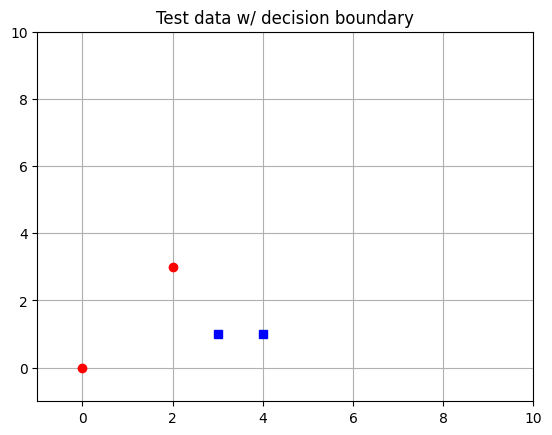

In [ ]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

x_train = np.array([[2, 3], [4, 1]]) #훈련 데이터 생성
y_train = np.array([1, -1]) #훈련 데이터 포인트 레이블 지정

#클래스 1 = ro, 클래스 2 = bs
plt.title("Training data")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.grid(True) #그리드 활성화
plt.axis([-1, 10, -1, 10])#그래프의 축 범위를 [-1, 10, -1, 10]으로 설정
plt.show()

svm_clf = svm.SVC(kernel='linear') #선형 커널을 사용하는 SVC(Support Vector Classifier) 초기화
svm_clf.fit(x_train, y_train)#SVM 분류기를 훈련 데이터에 맞춤


# Create grid to evaluate model
xx = np.linspace(-1, 10, 30) #-1부터 10까지의 범위에서 균일한 간격으로 30개의 값으로 구성된 배열을 생성하여 저장
yy = np.linspace(-1, 10, 30) #-1부터 10까지의 범위에서 균일한 간격으로 30개의 값으로 구성된 배열을 생성하여 저장
YY, XX = np.meshgrid(yy, xx) #yy, xx 이용하여 2차원 격자 생성, 특성 공간에서의 결정 경계 표시를 위한 그리드 형성
xy = np.vstack([XX.ravel(), YY.ravel()]).T #XX와 YY를 일차원 배열로 만든 후 세로로 쌓아 (vstack) 2차원 배열 xy를 형성, SVM 모델을 평가하기 위한 격자 내의 모든 점들의 좌표를 포함함
Z = svm_clf.decision_function(xy).reshape(XX.shape) #xy에 있는 각 점에 대한 결정 함수값을 계산하고, 이를 XX의 형태로 재구성. Z에는 격자 위의 각 점에 대한 결정 함수의 값이 저장됨

plt.title("Training data w/ decision boundary")
#클래스가 1인 데이터는 빨간색 원으로, -1인 데이터는 파란색 사각형
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
#Z 값을 이용하여 결정 경계와 서포트 벡터의 마진을 나타내는 등고선을 그림. 여기서 levels=[-1, 0, 1]은 마진 경계와 결정 경계를 지정
plt.contour(XX, YY, Z, levels=[-1, 0, 1])
plt.grid(True)
plt.axis([-1, 10, -1, 10])#축 범위를 설정
plt.show()

x_test = np.array([[0, 0], [3, 1]]) #테스트 데이터 생성
y_pred = svm_clf.predict(x_test) #svm_clf 모델을 사용하여 x_test에 대한 예측 수행

print('Results: ',y_pred)#예측 결과 출력

plt.title("Test data w/ decision boundary")
#훈련 데이터를 플롯 - 아까와 동일
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
# plt.contour(XX, YY, Z, levels=[-1, 0, 1])
#테스트 데이터를 그래프에 포함시켜 예측된 클래스에 따라 빨간색 원 또는 파란색 사각형으로 표시
plt.plot(x_test[y_pred==1, 0], x_test[y_pred==1, 1], 'ro', x_test[y_pred==-1, 0], x_test[y_pred==-1, 1], 'bs')
plt.grid(True)
plt.axis([-1, 10, -1, 10])
plt.show()

# plot_decision_function(x_train, y_train, x_test, y_test, svm_clf)

### **Example2) 선형 SVM: 3개의 샘플**

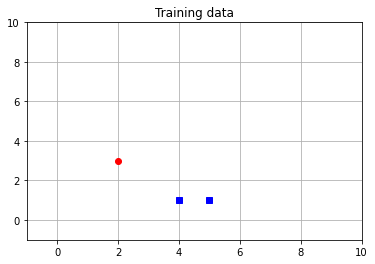

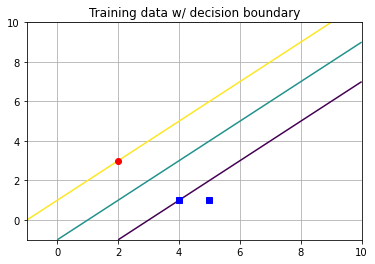

[ 1 -1]


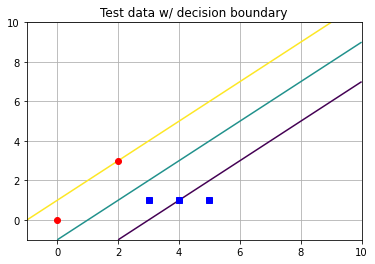

In [ ]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

x_train = np.array([[2, 3], [4, 1], [5, 1]])
y_train = np.array([1, -1, -1])

plt.title("Training data")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.grid(True)
plt.axis([-1, 10, -1, 10])
plt.show()

svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(x_train, y_train)

# Create grid to evaluate model
xx = np.linspace(-1, 10, 30)
yy = np.linspace(-1, 10, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_clf.decision_function(xy).reshape(XX.shape)

plt.title("Training data w/ decision boundary")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.contour(XX, YY, Z, levels=[-1, 0, 1])
plt.grid(True)
plt.axis([-1, 10, -1, 10])
plt.show()

x_test = np.array([[0, 0], [3, 1]])
y_pred = svm_clf.predict(x_test)

print(y_pred)

plt.title("Test data w/ decision boundary")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.contour(XX, YY, Z, levels=[-1, 0, 1])
plt.plot(x_test[y_pred==1, 0], x_test[y_pred==1, 1], 'ro', x_test[y_pred==-1, 0], x_test[y_pred==-1, 1], 'bs')
plt.grid(True)
plt.axis([-1, 10, -1, 10])
plt.show()

# plot_decision_function(x_train, y_train, x_test, y_test, svm_clf)

### **Example3) 비선형 SVM: 3개의 샘플**

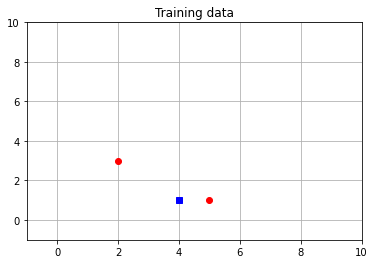

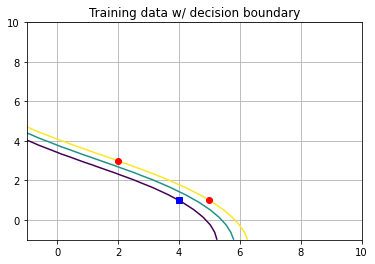

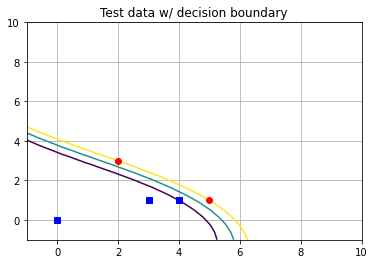

In [ ]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

x_train = np.array([[2, 3], [5, 1], [4, 1]])#x_train은 특성
y_train = np.array([1, 1, -1])#y_train은 데이터 분류

plt.title("Training data")#훈련 데이터 시각화
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.grid(True)
plt.axis([-1, 10, -1, 10])
plt.show()

#다항 커널을 사용하는 SVM 분류기를 초기화. SVC(kernel='poly')는 다항식 커널을 사용하며, 데이터가 비선형적인 관계일 때 유용
svm_clf = svm.SVC(kernel='poly') # {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
svm_clf.fit(x_train, y_train)#훈련 데이터 세트에 맞게 학습(fit)

# Create grid to evaluate model
xx = np.linspace(-1, 10, 30)# -1부터 10까지의 범위에서 균등한 간격으로 30개의 값 생성. 가로축 값 설정을 위함
yy = np.linspace(-1, 10, 30)# -1부터 10까지의 범위에서 균등한 간격으로 30개의 값. 세로축 값
YY, XX = np.meshgrid(yy, xx)# 2차원 격자 생성. 모든 조합의 (x,y)점 얻을 수 있음
xy = np.vstack([XX.ravel(), YY.ravel()]).T#격자(mesh)를 이루는 모든 점들을 (x, y) 형태의 좌표로 변환하여 array 형태로 xy에 저장,
#ravel()는 다차원 배열을 1차원으로 평탄화 시킴, np.vstack은 배열을 수직(열 기준)으로 쌓아서 2차원 배열을 만듦, .T를 통해 전치(transpose)를 해서 x와 y 좌표가 올바르게 배열에 저장되게 함
Z = svm_clf.decision_function(xy).reshape(XX.shape)#생성된 모든 (x, y) 점에 대해 SVM 분류 모델의 결정 함수를 계산

plt.title("Training data w/ decision boundary") #결정 경계 시각화
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.contour(XX, YY, Z, levels=[-1, 0, 1])
plt.grid(True)
plt.axis([-1, 10, -1, 10])
plt.show()

x_test = np.array([[0, 0], [3, 1]])#테스트 데이터 셋 정의
y_pred = svm_clf.predict(x_test)#학습된 모델을 사용해 이 데이터의 분류 예측

plt.title("Test data w/ decision boundary")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.contour(XX, YY, Z, levels=[-1, 0, 1])
plt.plot(x_test[y_pred==1, 0], x_test[y_pred==1, 1], 'ro', x_test[y_pred==-1, 0], x_test[y_pred==-1, 1], 'bs')
plt.grid(True)
plt.axis([-1, 10, -1, 10])
plt.show()

# plot_decision_function(x_train, y_train, x_test, y_test, svm_clf)